<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.9.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 6

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   1   0   0  37 192 177 171 199  27   0   0   0   1   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0 135 230 162 155 253 164  14   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0  64 152 232 207 195 155 157 201 227 224 221 172  94   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 112 179 205 199 192 197 216 194 192 220 210 192 191 203 207 208  62   0   1   0   0   0]
 [  0   0   0   0   0  75 208 186 178 185 172 197 213 195 200 208 199 188 187 181 180 204 192   0   0   0   0   0]
 [  0   0   0   0   0 180 190 179 185 182 184 178 166 193 185 167 187 186 184 184 192 192 223  28   0   0   0   0]
 [  0   0   0   0   0 205 190 182 182 185 182 185 181 182 180 180 185 186 182 184 201 195 219  72   0   0   0   0]
 [  0   0   0   0   0 210 186 194 181 181 182 178 180 184 182 177 179 185 184 194 211 188 218  95   0   0   0   0]
 [  0   0   0   0   0 217 179 193 193 175 175 174 

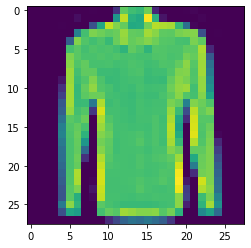

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 40

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [7]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [8]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Metal device set to: Apple M1


2022-05-23 20:00:50.381666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-23 20:00:50.381859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
  28/1875 [..............................] - ETA: 7s - loss: 0.2756 - accuracy: 0.8962

2022-05-23 20:12:10.375916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2822 - accuracy: 0.8951
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.9003
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9039
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2479 - accuracy: 0.9074
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2399 - accuracy: 0.9114
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2330 - accuracy: 0.9122
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2245 - accuracy: 0.9150
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2182 - accuracy: 0.9175
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2134 - accuracy: 0.9208
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2058 - accurac

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [12]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

 29/313 [=>............................] - ETA: 1s - loss: 0.6165 - accuracy: 0.8804

2022-05-23 20:18:01.924411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.5673 - accuracy: 0.8840


[0.5673215389251709, 0.8840000629425049]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [13]:
classifications = model.predict(test_images)

print(classifications[0])

114/313 [=========>....................] - ETA: 0s

2022-05-23 20:20:02.550049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[2.6182740e-22 6.7474444e-29 1.5776964e-26 9.7054241e-26 3.6477291e-28 2.7870875e-08 2.9044116e-25 4.1634397e-08 2.2072376e-21 1.0000000e+00]


In [15]:
print(classifications)

[[2.61827403e-22 6.74744440e-29 1.57769639e-26 ... 4.16343973e-08 2.20723756e-21 1.00000000e+00]
 [9.67848682e-05 4.10444897e-28 9.98948872e-01 ... 2.61245685e-25 1.54633285e-14 9.73698257e-27]
 [1.43690610e-20 1.00000000e+00 8.33550191e-31 ... 0.00000000e+00 3.29716523e-35 0.00000000e+00]
 ...
 [9.60321019e-20 6.29676104e-33 3.33254671e-21 ... 2.62861075e-30 1.00000000e+00 0.00000000e+00]
 [1.03669894e-13 1.00000000e+00 2.23640584e-23 ... 0.00000000e+00 7.28467166e-23 5.58622892e-32]
 [8.65048931e-14 1.93149955e-25 7.24395441e-16 ... 5.24283166e-07 1.68900768e-10 1.79894229e-12]]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [14]:
print(test_labels[0])

9


In [16]:
print(test_labels)

[9 2 1 ... 8 1 5]


### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

</p>
</details>

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [18]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=50)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/50
  48/1875 [..............................] - ETA: 6s - loss: 0.9820

2022-05-23 20:27:59.827234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2012
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0806
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0367
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0272
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0202
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0158
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0150
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0107
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092
Epoch 12/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088
Epoch 13/50


2022-05-23 20:33:08.878781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


114/313 [=========>....................] - ETA: 0s

2022-05-23 20:33:09.795788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[2.5618559e-31 7.5701248e-34 1.0164925e-28 8.1418993e-22 2.5036789e-38 7.0235602e-29 1.0710133e-33 1.0000000e+00 3.1868243e-33 1.1789968e-23]
7


In [19]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1772


0.17716871201992035

In [20]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[2.5618559e-31 7.5701248e-34 1.0164925e-28 8.1418993e-22 2.5036789e-38 7.0235602e-29 1.0710133e-33 1.0000000e+00 3.1868243e-33 1.1789968e-23]


In [21]:
print(test_labels[0])

7


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [23]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: in user code:

    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/Users/aliceliang/CS/miniforge3/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [24]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
   1/1875 [..............................] - ETA: 9:14 - loss: 0.8419

2022-05-23 20:51:05.303492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.1972
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5228
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8704
Epoch 5/5
 61/313 [====>.........................] - ETA: 0s - loss: 0.6268

2022-05-23 20:51:33.321915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


122/313 [==========>...................] - ETA: 0s

2022-05-23 20:51:34.206138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[4.53160406e-04 7.08862254e-03 1.14576906e-04 9.88304734e-01 4.03897557e-03]
7


### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

<details><summary>Click for Answer</summary>
<p>

#### Answer 
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

</p>
</details>

In [26]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=50)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/50
  29/1875 [..............................] - ETA: 6s - loss: 1.3063 

2022-05-23 20:54:40.967582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.1993
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0848
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0557
Epoch 4/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0450
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0215
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0149
Epoch 11/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0160
Epoch 12/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145
Epoch 13/50


2022-05-23 21:00:15.824506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


103/313 [========>.....................] - ETA: 0s

2022-05-23 21:00:16.805144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[0.0000000e+00 8.1509834e-35 1.5462803e-36 3.1367024e-36 3.4286384e-32 6.0571577e-37 0.0000000e+00 1.0000000e+00 7.1464820e-38 1.8513652e-24]
7


In [27]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2237


0.22367464005947113

In [28]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[0.0000000e+00 8.1509834e-35 1.5462803e-36 3.1367024e-36 3.4286384e-32 6.0571577e-37 0.0000000e+00 1.0000000e+00 7.1464820e-38 1.8513652e-24]
7


### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [29]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/5
  53/1875 [..............................] - ETA: 5s - loss: 1.1879

2022-05-23 21:01:45.590406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2609
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1142
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585
Epoch 5/5
 60/313 [====>.........................] - ETA: 0s - loss: 0.0858

2022-05-23 21:02:12.787463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


119/313 [==========>...................] - ETA: 0s

2022-05-23 21:02:13.685857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
[8.0773790e-11 7.5913071e-08 8.2322231e-06 2.7565891e-06 7.1755046e-11 1.0804633e-11 1.9768245e-14 9.9998879e-01 1.6028324e-07 1.6686588e-08]
7


### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [35]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
  25/1875 [..............................] - ETA: 7s - loss: 49.0659 

2022-05-23 21:07:24.785368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 2.5047
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3007
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2776
Epoch 5/5
 57/313 [====>.........................] - ETA: 0s - loss: 0.4568

2022-05-23 21:07:56.035402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 89/313 [=======>......................] - ETA: 0s

2022-05-23 21:07:56.937681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
[0.0000000e+00 1.8439374e-29 5.5459080e-23 9.3935826e-20 1.2006098e-31 3.0751097e-28 0.0000000e+00 1.0000000e+00 1.6444317e-38 4.6871015e-18]
7


### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [38]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        count=0
        if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
            count+=1
            if count>=3:
                print("\nReached 95% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])


Epoch 1/50
  24/1875 [..............................] - ETA: 8s - loss: 1.1600 - accuracy: 0.5977

2022-05-23 21:19:11.226029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4677 - accuracy: 0.8311
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3556 - accuracy: 0.8704
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3217 - accuracy: 0.8813
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2945 - accuracy: 0.8915
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2780 - accuracy: 0.8964
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2628 - accuracy: 0.9022
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2508 - accuracy: 0.9066
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2381 - accuracy: 0.9108
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2273 - accuracy: 0.9156
Epoch 10/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2196 - accurac